Starting off with installing and importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [6]:
!pip install feature_engine

Reading the house data file

In [8]:
house = pd.read_csv("C:/Users/Adithya Arunganesh/Desktop/Machine Learning/HW1/data.csv")

In [10]:
house.info()
house.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             3000 non-null   int64  
 1   price          3000 non-null   float64
 2   bedrooms       3000 non-null   int64  
 3   bathrooms      3000 non-null   float64
 4   sqft_living    3000 non-null   int64  
 5   sqft_lot       3000 non-null   int64  
 6   floors         3000 non-null   float64
 7   waterfront     3000 non-null   int64  
 8   view           3000 non-null   int64  
 9   condition      3000 non-null   int64  
 10  sqft_above     3000 non-null   int64  
 11  sqft_basement  3000 non-null   int64  
 12  yr_built       3000 non-null   int64  
 13  yr_renovated   3000 non-null   int64  
 14  street         3000 non-null   object 
 15  city           3000 non-null   object 
 16  statezip       3000 non-null   object 
 17  country        3000 non-null   object 
dtypes: float

,Id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,1,591000.0,3,1.75,1680,2400,1.0,0,0,5,870,810,1922,1956,1600-1608 25th Ave,Seattle,WA 98122,USA
1,2,415000.0,4,2.25,3060,48787,2.0,0,0,3,3060,0,1992,0,31701-31799 SE 291st St,Ravensdale,WA 98051,USA
2,3,402000.0,3,2.50,1960,8000,1.0,0,0,4,1290,670,1977,0,12207 NE 139th Pl,Kirkland,WA 98034,USA
3,4,542525.0,4,2.50,2650,5600,2.0,0,0,3,2650,0,2014,0,13516 164th Ave SE,Renton,WA 98059,USA
4,5,515000.0,3,2.50,2010,7200,2.0,0,0,3,2010,0,1994,0,8818 NE 150th St,Kenmore,WA 98028,USA


Importing the make prediction data

In [3]:
make_pred=pd.read_csv("C:/Users/Adithya Arunganesh/Desktop/Machine Learning/HW1/make_prediction.csv")

make_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1552 non-null   int64  
 1   bedrooms       1552 non-null   int64  
 2   bathrooms      1552 non-null   float64
 3   sqft_living    1552 non-null   int64  
 4   sqft_lot       1552 non-null   int64  
 5   floors         1552 non-null   float64
 6   waterfront     1552 non-null   int64  
 7   view           1552 non-null   int64  
 8   condition      1552 non-null   int64  
 9   sqft_above     1552 non-null   int64  
 10  sqft_basement  1552 non-null   int64  
 11  yr_built       1552 non-null   int64  
 12  yr_renovated   1552 non-null   int64  
 13  street         1552 non-null   object 
 14  city           1552 non-null   object 
 15  statezip       1552 non-null   object 
 16  country        1552 non-null   object 
dtypes: float64(2), int64(11), object(4)
memory usage: 20

To View Categorical and Numerical variables

In [11]:
categorical=[var for var in house.columns if house[var].dtype == 'O']

print('There are {} categorical variables, they are {} '.format(len(categorical),categorical))


There are 4 categorical variables, they are ['street', 'city', 'statezip', 'country'] 


In [12]:
discrete = [
    var for var in house.columns if house[var].dtype != 'O'
    and len(house[var].unique()) < 20 and var not in categorical
]

print('There are {} continuous variables, they are: {}' .format(len(discrete),discrete))

There are 5 continuous variables, they are: ['bedrooms', 'floors', 'waterfront', 'view', 'condition']


In [13]:
numerical=[var for var in house.columns if house[var].dtype!="O"
          and var not in categorical and var not in discrete
          and var not in ['Id', 'price']]


print('There are {} continuous variables, they are: {}' .format(len(numerical),numerical))

There are 7 continuous variables, they are: ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


Missing values

In [14]:
house.isnull().sum()

Id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

To visualize the continuous variables

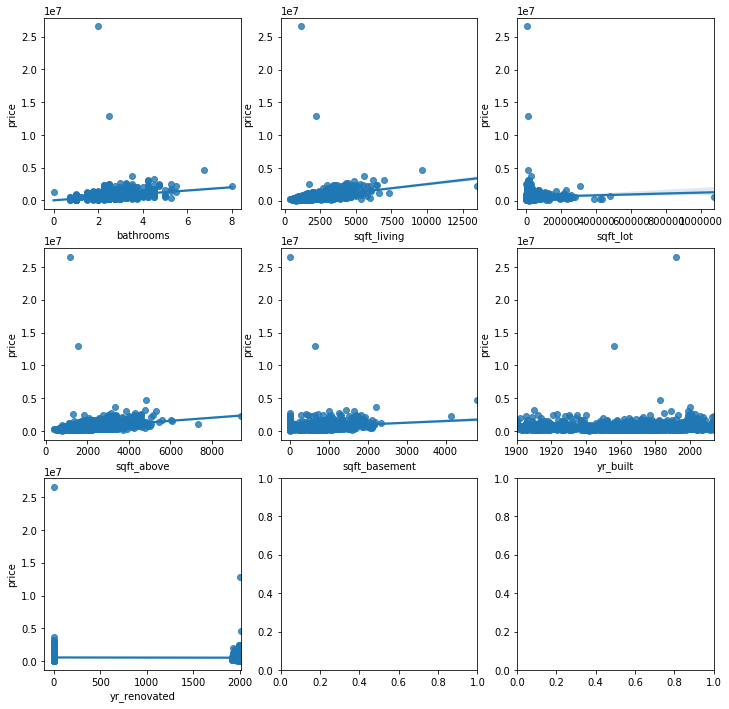

In [15]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(12,12))
axs = axs.flatten()

for i, var in enumerate(numerical):
    if var != "price":
        sns.regplot(x=var, y="price", data=house, ax=axs[i]);

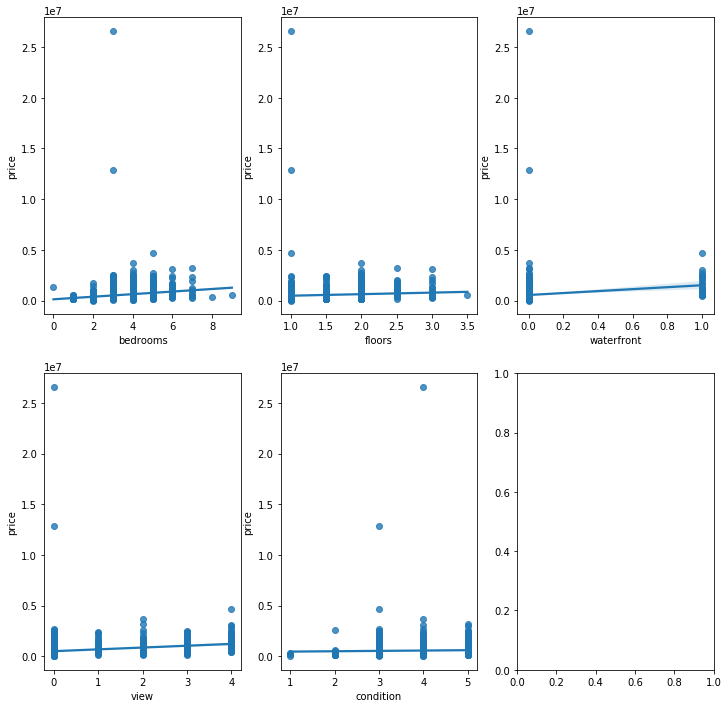

In [212]:
fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(12,12))
axs = axs.flatten()

for i, var in enumerate(discrete):
    if var != "price":
        sns.regplot(x=var, y="price", data=house, ax=axs[i]);

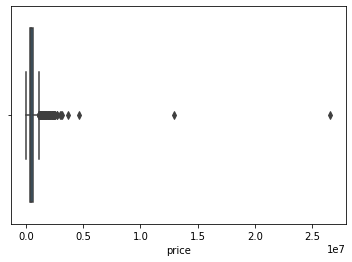

In [213]:
sns.boxplot(house[house['price'].notnull()]['price'])

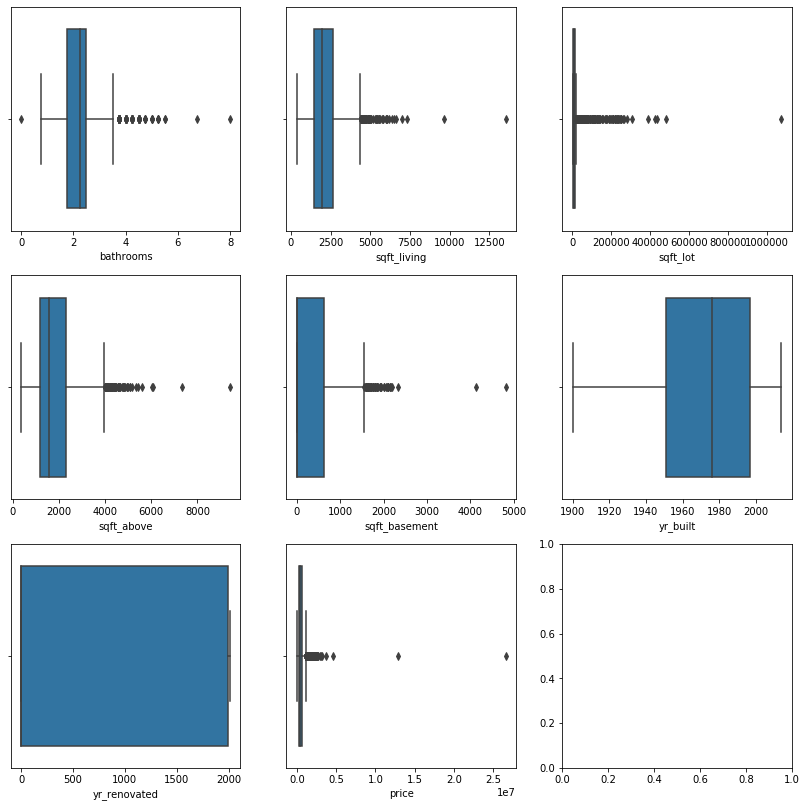

In [215]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(numerical + ['price']):
    sns.boxplot(house[house[var].notnull()][var], ax=axs[i]);

Outlier treatement

In [16]:
def boundary(df, var, dist):
    q1 = df[var].quantile(0.75)
    q3 = df[var].quantile(0.25)
    
    IQR = q1-q3
    
    low = q3 - (IQR*dist)
    up  = q1 - (IQR*dist)
    
    return up,low

In [17]:
outlier_d={}
for var in numerical:
    up, low = boundary(house, var,1.5)
    outliers = np.where(house[var] > up, True,
                    np.where(house[var] < low, True, False))
    outlier_d[var]=house.loc[outliers, var]  
    

In [18]:
for key, value in outlier_d.items():
    print(key, outlier_d[key].count(),outlier_d[key].min(),outlier_d[key].max())

bathrooms 2504 0.0 8.0
sqft_living 2900 880 13540
sqft_lot 2819 2053 1074218
sqft_above 2988 650 9410
sqft_basement 3000 0 4820
yr_built 2636 1929 2014
yr_renovated 3000 0 2014


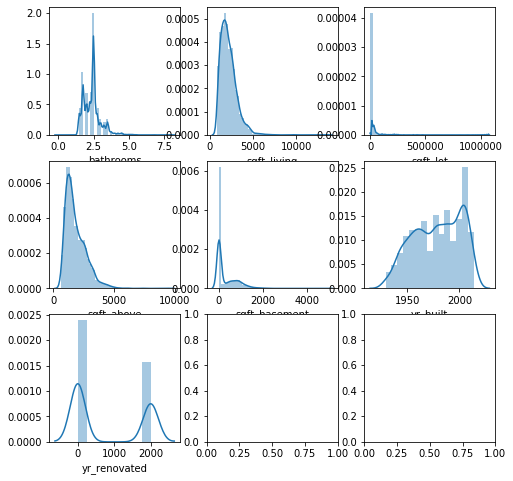

In [19]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(8,8))
axs = axs.flatten()

for i, var in enumerate(numerical):
    sns.distplot(outlier_d[var], ax=axs[i]);

Feature Magnitude

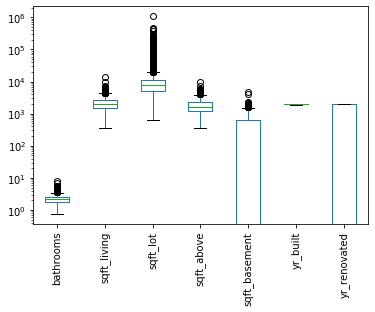

In [20]:
house[numerical].plot(kind='box', rot=90, logy=True)

Separating the data into x and y(target)

In [128]:
x=house.drop(['Id', 'price','street', 'country'], axis=1)
y=house['price']

x.shape,y.shape

((3000, 14), (3000,))

In [129]:
x_mp = make_pred.drop(['Id', 'street', 'country'], axis=1)

x_mp.shape

(1552, 14)

Splitting into training and split

In [155]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, x_test.shape
y_train.shape, y_test.shape

((2400,), (600,))

Feature Engineering

In [149]:
from sklearn.pipeline import Pipeline
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.neighbors import KNeighborsRegressor


In [277]:
house_pipe=Pipeline([
    ('rare_label_encoder',
     RareLabelCategoricalEncoder(tol=1, n_categories=4, variables=['city','statezip'])),
    
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None, variables=['city','statezip'], drop_last=True)),
                
    ('knn', KNeighborsRegressor())
])


In [450]:
from sklearn.model_selection import GridSearchCV

param_grid = {'rare_label_encoder__tol': [0.0002,0.002,0.02,2],
              'categorical_encoder__top_categories': [None,2,3],
              'knn__n_neighbors': range (1,10) }


grid_search = GridSearchCV(house_pipe, param_grid,
                           cv=5, iid=False, n_jobs=-1)

In [406]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelCategoricalEncoder(n_categories=4,
                                                                    tol=1,
                                                                    variables=['city',
                                                                               'statezip'])),
                                       ('categorical_encoder',
                                        OneHotCategoricalEncoder(drop_last=True,
                                                                 variables=['city',
                                                                            'statezip'])),
                                       ('knn', KNeighborsRegressor())]),
             iid=False, n_jobs=-1,
             param_grid={'categorical_encoder__top_categories': [None, 2, 3],
                         'knn__n_neighbors': range(1, 10),
               

In [407]:
grid_search.best_params_

{'categorical_encoder__top_categories': None,
 'knn__n_neighbors': 6,
 'rare_label_encoder__tol': 0.0002}

In [447]:
train_score=grid_search.score(x_train, y_train)

print("The Train set score is: {:.2f}%".format(train_score*100))

The Train set score is: 28.43%


In [448]:
test_score=grid_search.score(x_test, y_test)

print("Test set score: {:.2f}%".format(test_score*100))

Test set score: 38.62%


In [446]:
MakePred = grid_search.predict(x_mp)
MakePred.shape

(1552,)

In [4]:
pd.DataFrame({'Id': make_pred.Id, 'price': MakePred}).to_csv('final.csv', index =False)  


AttributeError: 'DataFrame' object has no attribute 'id'